![Alt text](https://imgur.com/orZWHly.png=80)

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1' # To prevent memory leak by kmeans

In [16]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
# Information on the dataset
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [4]:
# Create dummy variables for the available categorical feature in the dataset
penguins_df = pd.get_dummies(penguins_df)
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
3,36.7,19.3,193.0,3450.0,True,False
4,39.3,20.6,190.0,3650.0,False,True


In [5]:
# Standardizing a dataset
scaler = StandardScaler()
penguins_scaled_df = pd.DataFrame(scaler.fit_transform(penguins_df), columns=penguins_df.columns.tolist())
penguins_scaled_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


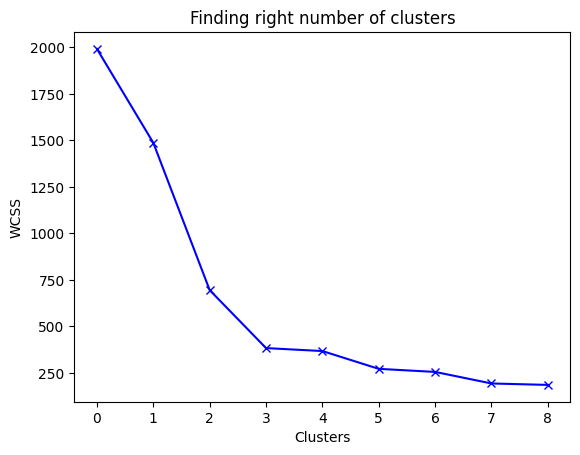

In [6]:
# Finding the best optimal number of clusters
scores = []

range_values = range(1,10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(penguins_scaled_df)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS') 
plt.show()

**The optimal number of clusters for the dataset is 3.**

In [7]:
# Applying the kmeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_scaled_df)

KMeans(n_clusters=3, random_state=42)

In [8]:
# Finding the labels created using kmeans
cluster_labels = kmeans.labels_
cluster_labels

array([0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

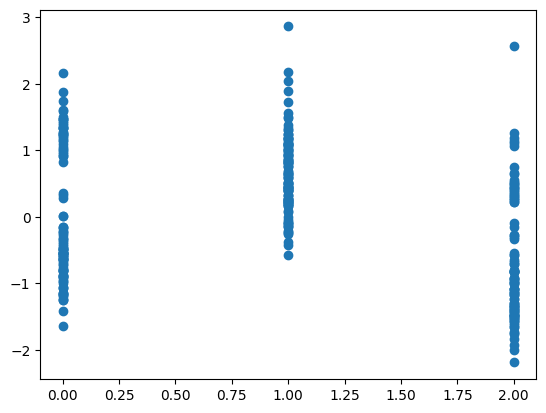

In [9]:
# Scatter plot for label vs culmen_length_mm
plt.scatter(cluster_labels, penguins_scaled_df['culmen_length_mm'])
plt.show()

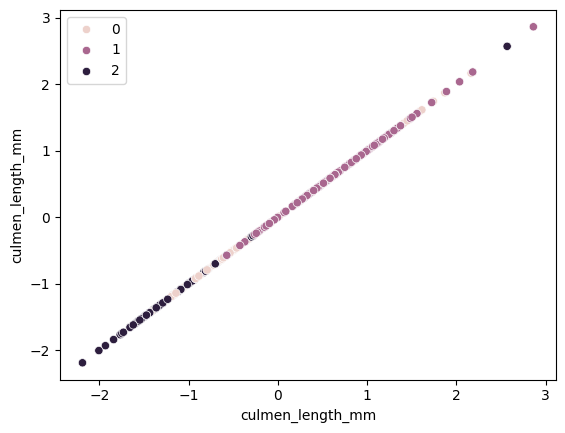

In [20]:
# Scatter plot for culmen_depth_mm vs culmen_length_mm
sns.scatterplot(x=penguins_scaled_df['culmen_length_mm'], y=penguins_scaled_df['culmen_length_mm'], hue = cluster_labels)
plt.show()

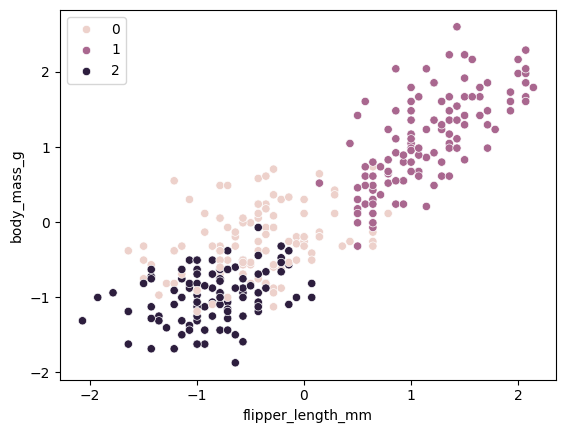

In [21]:
# Scatter plot for flipper_length_mm vs body_mass_g
sns.scatterplot(x=penguins_scaled_df['flipper_length_mm'], y=penguins_scaled_df['body_mass_g'], hue = cluster_labels)
plt.show()

In [13]:
# Adding the label columns to the penguins_df
penguins_final_df = penguins_df.drop(columns=['sex_FEMALE', 'sex_MALE'])
penguins_final_df['label'] = cluster_labels
penguins_final_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,2
2,40.3,18.0,195.0,3250.0,2
3,36.7,19.3,193.0,3450.0,2
4,39.3,20.6,190.0,3650.0,0


In [15]:
# Final characteristic DataFrame, stat_penguins, aggregating the numeric columns
stat_penguins = penguins_final_df.groupby('label')[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,47.568067,14.996639,217.235294,5092.436975
2,40.217757,17.611215,189.046729,3419.158879
